In [16]:
import numpy as np
import tensorly as tl

In [17]:
u = [3, 4, 0, 1]
v = [1, 0, -1, 2]
w = [4, -3, 4, 0]

In [18]:
#SKalarprodukt
np.dot(u,v)

5

In [19]:
np.dot(u,w)

0

In [20]:
np.dot(v,w)

0

In [21]:
A = [[3, 0, 4, 1], [2, 1, 3, 2]] #Zeile für Zeile
np.transpose(A)

array([[3, 2],
       [0, 1],
       [4, 3],
       [1, 2]])

In [22]:
u = [2, 0, 4, 1]
v = [1, 2]
np.dot(A,u)
np.dot(np.transpose(A),v)

array([ 7,  2, 10,  5])

In [23]:
#dyadisches Produkt
u = [2, 4, 1]
v = [3, 1, 3, 2]
w = [5, 2]
np.outer(u,v) #Transpose nicht notwendig bei Produkt

array([[ 6,  2,  6,  4],
       [12,  4, 12,  8],
       [ 3,  1,  3,  2]])

In [24]:
#dyadisches Produkt
np.einsum("i,j->ij",u,v)

array([[ 6,  2,  6,  4],
       [12,  4, 12,  8],
       [ 3,  1,  3,  2]])

In [25]:
np.einsum("i,j,k->ijk",w,u,v)


array([[[30, 10, 30, 20],
        [60, 20, 60, 40],
        [15,  5, 15, 10]],

       [[12,  4, 12,  8],
        [24,  8, 24, 16],
        [ 6,  2,  6,  4]]])

In [1]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [2]:
from sklearn.model_selection import train_test_split as tts
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

x, x_test, y_true, y_test = tts(cancer.data, cancer.target, test_size=0.1,  random_state=42)

model = LDA(n_components=1)
model.fit(x, y_true)
x_proj = model.transform(x)
x_test_proj = model.transform(x_test)

In [3]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score
hits = [0] #für Grafik
for k in range(1,11): #Anzahl k anpassen, wird für jedes k in Range durchgeführt
  model = knn(n_neighbors=k)
  model.fit(x_proj, y_true)
  y_pred = model.predict(x_test_proj) #Vorhersage bestimmen
  hits.append(accuracy_score(y_test, y_pred)) #für Grafik

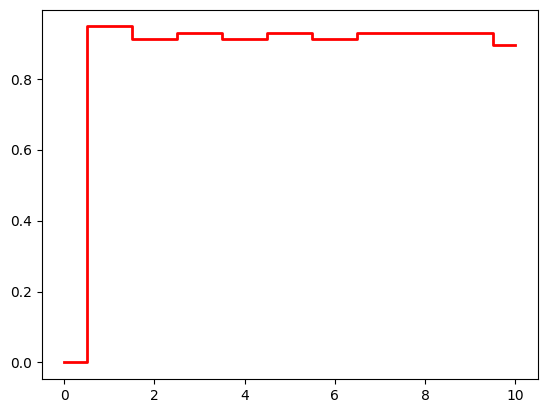

In [53]:
import numpy as np
import matplotlib.pyplot as plt

x_grid = np.linspace(0, 10, 11)
plt.step(x_grid, hits, where='mid', color='red', linewidth=2)
plt.show()

In [56]:
#falsche Klassifikation
for i in range(len(y_test)):
  if y_test[i] != y_pred[i]:
    print(cancer.target_names[y_test[i]], '=>',
      cancer.target_names[y_pred[i]])

benign => malignant
benign => malignant
malignant => benign
benign => malignant
benign => malignant
benign => malignant
